In [3]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [27]:
def parser(x):
    return datetime.strptime(x, '%m-%y')

# Load the dataset
url = 'https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/sales-of-shampoo-over-a-three-ye.csv'
series = pd.read_csv(url, header=0, parse_dates=[0], index_col=0, date_format=parser, sep=';')

series.head()

,Sales
Month,
01-01,266.0
01-02,145.9
01-03,183.1
01-04,119.3
01-05,180.3


In [33]:
# Check for missing values
series.isnull().sum()

Sales    0
dtype: int64

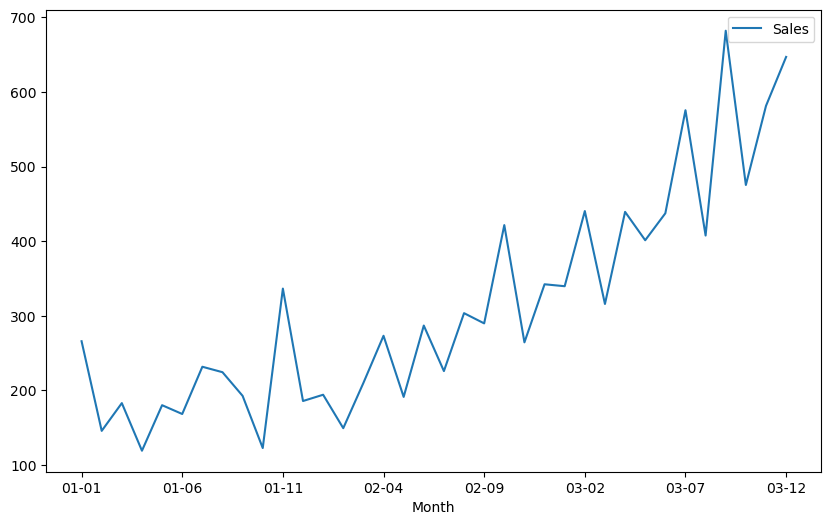

<Figure size 1000x600 with 0 Axes>

In [45]:
# Plot the data
series.plot(figsize=(10, 6))
plt.show()

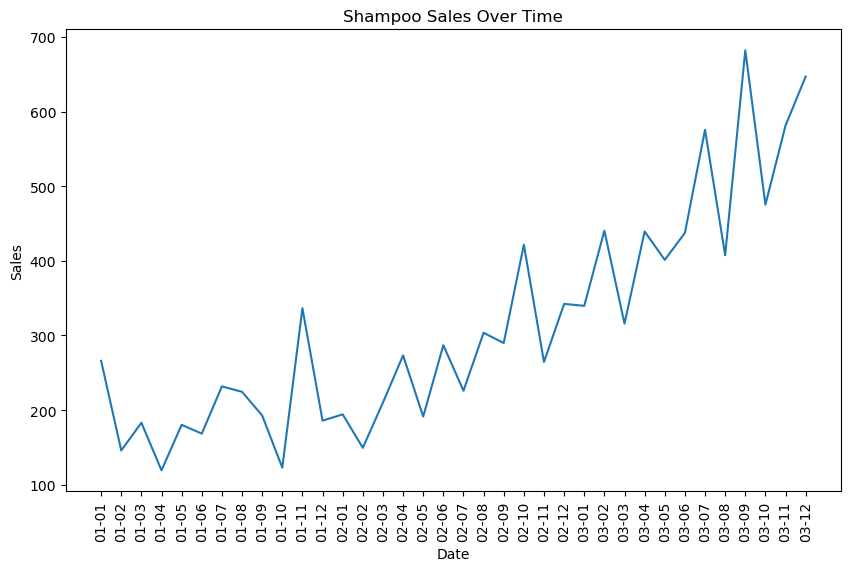

In [47]:
# visualizing data
plt.figure(figsize=(10, 6))
plt.plot(series)
plt.title('Shampoo Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

In [49]:
# Split data into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

In [51]:
# Fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   23
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -122.677
Date:                Tue, 09 Jul 2024   AIC                            257.354
Time:                        11:27:15   BIC                            263.900
Sample:                             0   HQIC                           258.896
                                 - 23                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8515      0.284     -2.999      0.003      -1.408      -0.295
ar.L2         -0.4084      0.334     -1.225      0.221      -1.062       0.245
ar.L3         -0.4066      0.417     -0.975      0.3

In [57]:
# Make predictions
predictions = model_fit.forecast(steps=len(test))

In [59]:
# Calculate MSE
mse = mean_squared_error(test, predictions)
print("Mean Squared Error: ",mse)

Mean Squared Error:  33099.10850038043


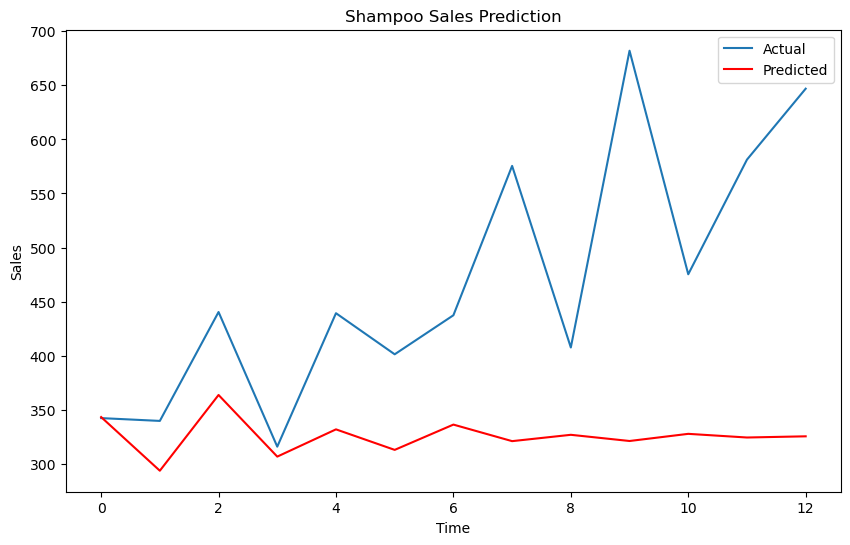

In [65]:
# Plot the predictions against actual values
plt.figure(figsize=(10, 6))
plt.plot(test, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.title('Shampoo Sales Prediction')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()